In [12]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image 

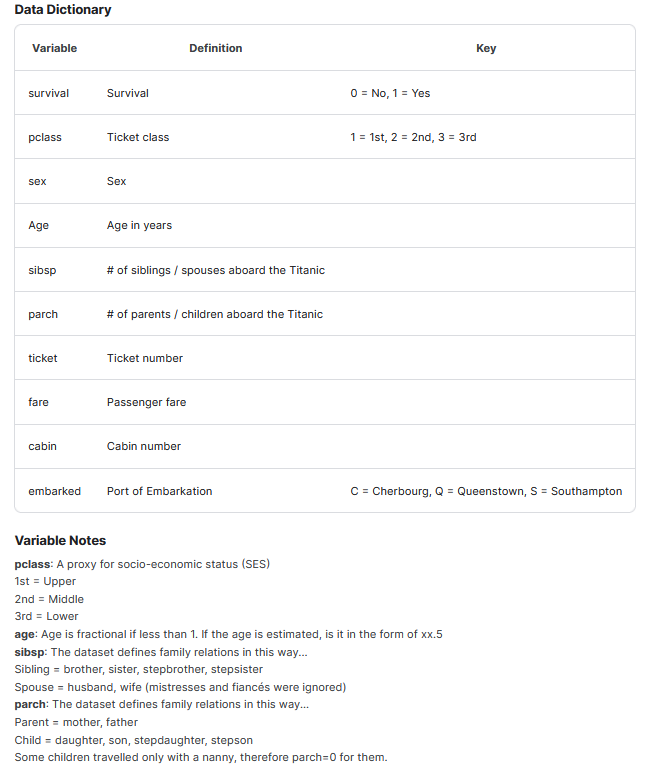

In [23]:
# get the image 
url = r"C:\ML Assignments\Kaggle\Titanic_Project\Data_description.png"
Image(url,width = 700 ,height= 700)

In [3]:
def find_csv_files(path):
    csv_files = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if name.endswith((".csv", ".csv")):
                csv_files.append(os.path.join(root, name))
    return csv_files

In [6]:
folder_path = "C:\ML Assignments\Kaggle\Titanic_Project"
csv_files_list = find_csv_files(folder_path)
for file_path in csv_files_list:
    print(file_path)

C:\ML Assignments\Kaggle\Titanic_Project\test.csv
C:\ML Assignments\Kaggle\Titanic_Project\train.csv


In [8]:
train_dataset = pd.read_csv(r"C:\ML Assignments\Kaggle\Titanic_Project\train.csv")
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Investigating the Features
- It is is importnt to observe existing features and decide on whether it is worth it to retain them or not . 

In [10]:
def intitial_eda_checks(df):
    '''
    This function inspects columns with missing values and produces the total sum of the missing values as well as the 
    their corresponding percentages . In this way , I will be able to remove columns with significantly missing values . 
    
    Data impuation could be applied in this case but that will require further data manipulation to decide on whether it
    it a lasting solution . 
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False)
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False)
        percent = mask_percent[mask_percent > 0]

        missing_data = pd.concat([total, percent],
                                 axis=1,
                                 keys=['Total', 'Percent'])

        print(f'Total and Percentage of NaN:\n {missing_data}')
    else:
        print('No NaN found.')

In [11]:
intitial_eda_checks(train_dataset)

Total and Percentage of NaN:
           Total   Percent
Cabin       687  0.771044
Age         177  0.198653
Embarked      2  0.002245


In [24]:
def delete_unimportant_features(df, feature_one, feature_two):
    '''
    This function takes in a DataFrame and removes specified columns that are not important for deciding
    a client's ability to receive credit. columns such as Names, customer_ID etc., do not play a part. 
    Users can specify additional features to drop out , more features to be removed will be taken care as time goes
    and this is very important for both of us . 
    '''
    df = df.drop(columns=[
        feature_one, feature_two
    ],
                 inplace=True)
    return df